 # Tarea 8.6 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

"Los siguientes datos corresponden al cálculo numérico de una cierta propiedad estadística de la distribución de materia en el universo (el espectro de potencias) $P(k)$ en función del modo de Fourier $k$. Use la derivada numérica para encontrar $d\ln P/d\ln k$ en cada punto. Para estimar el error cometido en esta derivada numérica compare el resultado de la fórmula a tres puntos con el resultado de la fórmula a cinco puntos. Será necesario usar las fórmulas a tres y cinco puntos en los extremos que se encuentran en este mismo notebook."

In [2]:
datos = np.array([       [5.531683013105e-04,       1.070304113861e+12], 
       [5.910227121702e-04,       1.139622191891e+12], 
       [6.315688849627e-04,       1.213481232452e+12], 
       [6.750065137883e-04,       1.292169597309e+12], 
       [7.215301959429e-04,       1.375954296780e+12], 
       [7.713235180257e-04,       1.465069697719e+12], 
       [8.245525173319e-04,       1.559705507566e+12], 
       [8.813589235833e-04,       1.659994890361e+12], 
       [9.418537183337e-04,       1.766003776663e+12], 
       [1.006111625261e-03,       1.877722471320e+12], 
       [1.074167130425e-03,       1.995060685935e+12], 
       [1.146012510269e-03,       2.117846703996e+12], 
       [1.221598126720e-03,       2.245831037960e+12], 
       [1.300834972303e-03,       2.378694410099e+12], 
       [1.383599172303e-03,       2.516052095865e+12], 
       [1.469737934874e-03,       2.657475892684e+12], 
       [1.559076324033e-03,       2.802524407596e+12], 
       [1.651424225675e-03,       2.950729179407e+12], 
       [1.746582964833e-03,       3.101618970269e+12], 
       [1.844351177716e-03,       3.254730780491e+12], 
       [1.944529704896e-03,       3.409618695392e+12], 
       [2.046925420592e-03,       3.565860320889e+12], 
       [2.151354028418e-03,       3.723061333248e+12], 
       [2.257641930146e-03,       3.880858018481e+12] ])

In [42]:
import numpy as np #importamos lo necesario
import matplotlib.pyplot as plt

In [43]:
def deriv3_datos(fxo, fx2, h):  
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):      #la funcion de la derivada numerica del profe
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv
    return (fx2 - fxo)/(2*h)

In [6]:
Datos_p=datos[:,0] #estos datos son los de P debido a que es una probabilidad y estan entre 0 y 1
Datos_k=datos[:,1] #y estos son los datos de k por descarte

In [11]:
Derivada_p=(1/Datos_p)*(deriv_datos(Datos_p,h)) #derivamos el ln y usamos la derivada de los datos
Derivada_k=(1/Datos_k)*(deriv_datos(Datos_k,h))

In [27]:
Derivada_completa=((Derivada_p*Datos_k)-(Derivada_k*Datos_p))/(Datos_k**2)#Derivada de la division

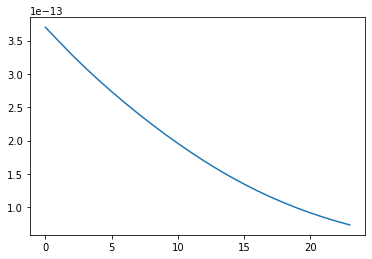

In [29]:
plt.plot(Derivada_completa)

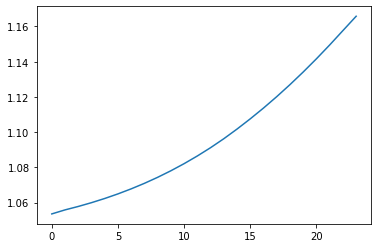

In [12]:
plt.plot(Derivada_p/Derivada_k)

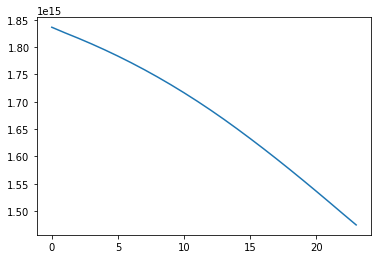

In [17]:
num=24
h=4/num
plt.plot((1/deriv_datos(Datos_p,h))/(1/deriv_datos(Datos_k,h)))

In [48]:
def deriv5_datos(fxo,fx1,fx2,fx3,h):
    return (fxo-8*fx1+8*fx2-fx3)/(12*h)

def deriv5_borde_datos(fxo,fx1,fx2,fx3,fx4,h):
    return (-25*fxo+48*fx1-36*fx2+16*fx3-3*fx4)/(12*h)
    
def deriv_datos5(fx,h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv5_borde_datos(fx[0], fx[1], fx[2],fx[3],h)
        elif i == n - 1:
            deriv[i] = deriv5_borde_datos(fx[n-1], fx[n-2], fx[n-3],fx[n-4],-h)
        else:
            deriv[i] = deriv5_datos(fx[i-1], fx[i+1], h)
    return deriv
    return (fx2 - fxo)/(12*h)

In [49]:
Derivada_p5=(1/Datos_p)*(deriv_datos5(Datos_p,h))
Derivada_k5=(1/Datos_k)*(deriv_datos5(Datos_k,h))

TypeError: deriv5_borde_datos() missing 1 required positional argument: 'h'

In [50]:
deriv_datos5(Datos_p,h)

TypeError: deriv5_borde_datos() missing 1 required positional argument: 'h'

In [25]:
Derivada3p=(deriv3_borde_datos(Datos_p[0],Datos_p[12],Datos_p[23],h))